# Goal : To build a classification model that accurately identifies fraudulent credit card transactions from a dataset, minimizing false negatives and false positives

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- Dataset contains 284,807 transactions, with extremely imbalanced classes (only ~0.17% are fraud).
- Most features are centered around zero, with consistent standard deviations.

- Transaction amounts range from ₹0 to ₹25,691, average is ₹88.


In [6]:
# Check Null Values 

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Here In the given Dataset no any missing values available.

In [7]:
# Check Duplicate Records 

print(df.duplicated().sum())

1081


In [8]:
# Here 1081 duplicate records so we can remove it 

df.drop_duplicates(inplace=True)

In [9]:
print(df.duplicated().sum())

0


In [10]:
# Check Class Column distribution

print(df['Class'].value_counts())

Class
0    283253
1       473
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x1f9ec2fa1e0>,
 [Text(-1.0999849139505065, 0.005760996554156921, 'Not Fraud'),
  Text(1.099984914296047, -0.005760930577456522, 'Fraud')],
 [Text(-0.5999917712457308, 0.0031423617568128656, '99.83'),
  Text(0.5999917714342073, -0.003142325769521739, '0.17')])

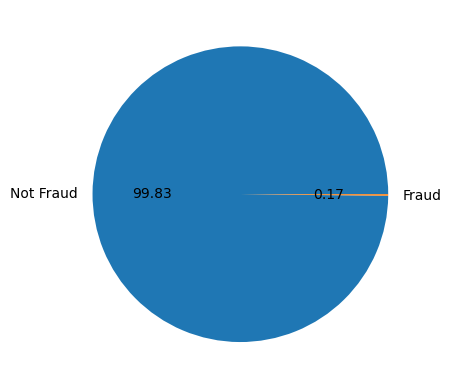

In [11]:
plt.pie(df['Class'].value_counts() , autopct="%.2f" , labels=['Not Fraud' , 'Fraud'])


Here 99.83% Not Fraud data available in dataset while only 0.17% Fraud data availble.

<Axes: ylabel='Amount'>

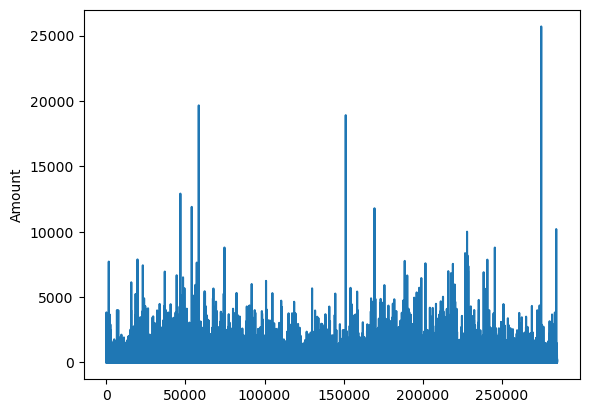

In [12]:
sns.lineplot(df['Amount'])

Above Line Chart Show the credit card amount distribution. here minimum 0 and maximum 25691.160000	.

In [13]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [28]:
df['Time']

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 283726, dtype: float64

In [38]:
df.drop(['Time'] , inplace =True , axis= 1 )

In [40]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [42]:
# Split into independent and dependent feature 

X = df.iloc[:,: -1]
y = df.iloc[:,-1]

In [44]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [46]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64

In [61]:
# SPlit into train and test data 
from sklearn.model_selection import train_test_split

X_train , X_test ,y_train , y_test = train_test_split(X ,y , test_size=0.3 , random_state=42)

In [63]:
X_train.shape , X_test.shape

((198608, 29), (85118, 29))

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
X_train

array([[ 0.54418331, -0.00253127,  0.77230333, ...,  0.09448828,
         0.02083017, -0.31606752],
       [ 0.43329534, -0.20433596, -0.12842086, ..., -0.21673071,
         0.12806115,  0.48343319],
       [ 0.06286558, -0.31319062, -0.09599613, ...,  0.06965911,
        -0.06591556, -0.23932183],
       ...,
       [ 0.64542209, -0.02810829, -0.47949331, ...,  0.11100351,
         0.07599982, -0.33398016],
       [ 1.01820088, -0.07992348, -0.7702669 , ..., -0.18508633,
        -0.17326862, -0.19473926],
       [-0.24298138,  0.50132   ,  0.8758651 , ..., -0.33417943,
        -0.14835869, -0.3518928 ]])

In [69]:
X_test

array([[ 0.53984617, -0.46442357,  0.10412627, ...,  0.25209803,
         0.12252204, -0.12730813],
       [-2.47884403,  2.65629752, -0.60810857, ...,  1.08267112,
        -1.34735191, -0.31280344],
       [-0.80178593, -0.15722017,  1.02799775, ..., -1.26933048,
        -0.76908952, -0.16846739],
       ...,
       [ 0.72141417, -0.59391819,  0.35968508, ...,  0.16888243,
         0.05903499, -0.29218401],
       [ 0.96010502, -0.09698521, -1.27498391, ..., -0.06309921,
        -0.1012168 , -0.01254784],
       [-0.62242424,  0.75170425, -0.32557936, ...,  0.5678028 ,
         0.55263248, -0.27980439]])

# Model Training

In [72]:
from sklearn.linear_model import  LogisticRegression

lgr = LogisticRegression()
lgr.fit(X_train , y_train)

LogisticRegression()

In [74]:
y_pred = lgr.predict(X_test)

In [76]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
# Model Evaluation

In [80]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report 

print("Accuracy : ",accuracy_score(y_pred  , y_test))
print(confusion_matrix(y_pred , y_test))
print(classification_report(y_pred , y_test))

Accuracy :  0.999177612255927
[[84974    60]
 [   10    74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85034
           1       0.55      0.88      0.68        84

    accuracy                           1.00     85118
   macro avg       0.78      0.94      0.84     85118
weighted avg       1.00      1.00      1.00     85118



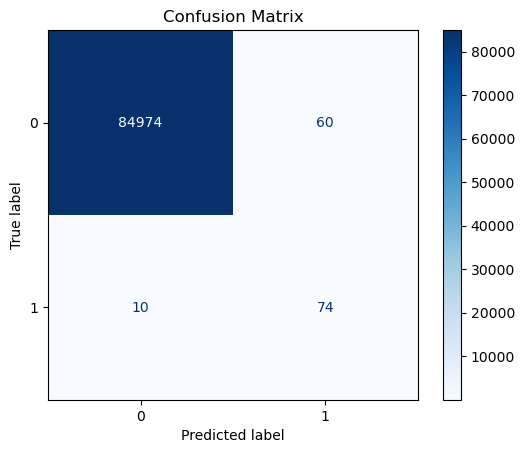

In [108]:
from sklearn.metrics import ConfusionMatrixDisplay

dis = ConfusionMatrixDisplay(confusion_matrix(y_pred , y_test))
dis.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [82]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train , y_train)

DecisionTreeClassifier()

In [84]:
y_pred_tree = tree.predict(X_test)
y_pred_tree

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report 

print("Accuracy : ",accuracy_score(y_pred_tree  , y_test))
print(confusion_matrix(y_pred_tree , y_test))
print(classification_report(y_pred_tree , y_test))

Accuracy :  0.9991306186705514
[[84940    30]
 [   44   104]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84970
           1       0.78      0.70      0.74       148

    accuracy                           1.00     85118
   macro avg       0.89      0.85      0.87     85118
weighted avg       1.00      1.00      1.00     85118



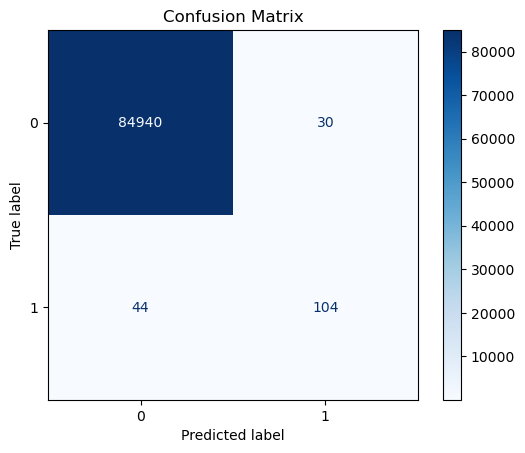

In [110]:
from sklearn.metrics import ConfusionMatrixDisplay

dis = ConfusionMatrixDisplay(confusion_matrix(y_pred_tree , y_test))
dis.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [98]:
from sklearn.ensemble import RandomForestClassifier

rnd_classifier = RandomForestClassifier()
rnd_classifier.fit(X_train , y_train)

RandomForestClassifier()

In [100]:
y_pred_rnd = rnd_classifier.predict(X_test)

In [102]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report 

print("Accuracy : ",accuracy_score(y_pred_rnd  , y_test))
print(confusion_matrix(y_pred_rnd , y_test))
print(classification_report(y_pred_rnd , y_test))

Accuracy :  0.9995183157499001
[[84979    36]
 [    5    98]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85015
           1       0.73      0.95      0.83       103

    accuracy                           1.00     85118
   macro avg       0.87      0.98      0.91     85118
weighted avg       1.00      1.00      1.00     85118



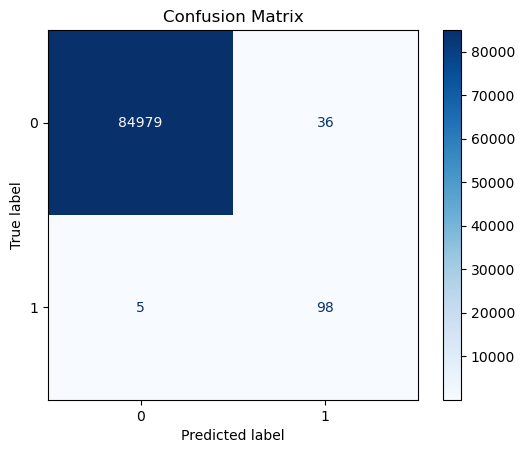

In [106]:
from sklearn.metrics import ConfusionMatrixDisplay

dis = ConfusionMatrixDisplay(confusion_matrix(y_pred_rnd , y_test))
dis.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Based on the trained model's performance, we can confidently use RandomForestClassifier because:
-  It shows very low false negatives (only 5), meaning almost all fraud cases are correctly identified.
-  False positives are minimal (36).
-  Achieves high precision (0.73) and recall (0.95) for the fraud class, leading to an impressive F1-score of 0.83.
-  Overall accuracy is 99.95% .
